In [3]:
library(rvest)     
library(dplyr)     
library(janitor)
library(ggplot2)   
library(stringr)
library(plotly)
library(purrr)
library(hoopR)
library(readxl)
library(tidyverse)
library(ggridges)
library(corrplot)

In [4]:
url <- "https://www.basketball-reference.com/leagues/NBA_stats_per_game.html"
league_avgs <- url |>
  read_html() |>
  html_element("table") |>
  html_table(fill = TRUE)    
league_avgs <- league_avgs |>
  row_to_names(row_number = 1) |> 
  clean_names()            
league_avgs <- league_avgs %>% 
  mutate(season = as.character(season))

league_avgs <- league_avgs %>%
  mutate(start_year = as.numeric(str_sub(season, 1, 4))) %>%
  filter(start_year >= 1979) %>%
  select(-start_year)  



Warning message:
There was 1 warning in `mutate()`.
ℹ In argument: `start_year = as.numeric(str_sub(season, 1, 4))`.
Caused by warning:
! NAs introduced by coercion 


In [5]:
print(league_avgs, n =50)

# A tibble: 47 × 33
   rk    season  lg    age   ht    wt    g     mp    fg    fga   x3p   x3pa  ft    fta   orb   drb   trb   ast   stl   blk   tov   pf    pts  
   <chr> <chr>   <chr> <chr> <chr> <chr> <chr> <chr> <chr> <chr> <chr> <chr> <chr> <chr> <chr> <chr> <chr> <chr> <chr> <chr> <chr> <chr> <chr>
 1 1     2025-26 NBA   26.4  6-7   216   191   241.7 41.7  89.0  13.4  37.3  20.2  25.6  11.6  32.4  44.1  26.5  8.6   4.8   15.3  21.9  116.9
 2 2     2024-25 NBA   26.3  6-7   215   1230  241.3 41.7  89.2  13.5  37.6  16.9  21.7  11.1  33.0  44.1  26.5  8.2   4.9   14.3  18.6  113.8
 3 3     2023-24 NBA   26.4  6-7   216   1230  241.4 42.2  88.9  12.8  35.1  17.0  21.7  10.6  33.0  43.5  26.7  7.5   5.1   13.6  18.7  114.2
 4 4     2022-23 NBA   26.1  6-6   216   1230  241.8 42.0  88.3  12.3  34.2  18.4  23.5  10.4  33.0  43.4  25.3  7.3   4.7   14.1  20.0  114.7
 5 5     2021-22 NBA   26.1  6-6   215   1230  241.4 40.6  88.1  12.4  35.2  16.9  21.9  10.3  34.1  44.5  24.6  7.6   4.7

Warning message:
Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.
This warning is displayed once every 8 hours.
Call `lifecycle::last_lifecycle_warnings()` to see where this warning was generated. 


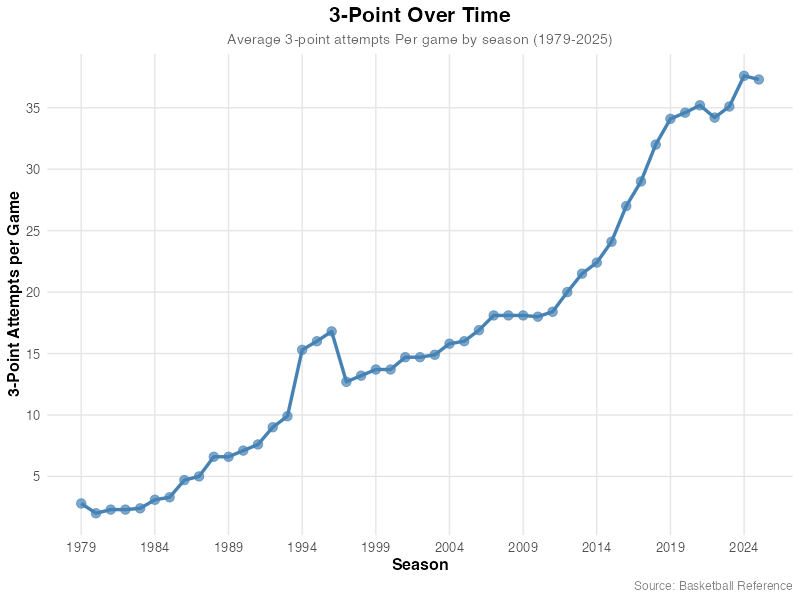

In [6]:
league_avgs <- league_avgs %>%
  mutate(start_year = as.numeric(str_sub(season, 1, 4)),
         x3pa_num = as.numeric(x3pa))

ggplot(data = league_avgs, aes(x = start_year, y = x3pa_num)) +
  geom_line(color = "steelblue", size = 1.2) +
  geom_point(color = "steelblue", size = 3, alpha = 0.7) +
  labs(
    title = "3-Point Over Time",
    subtitle = "Average 3-point attempts Per game by season (1979-2025)",
    x = "Season",
    y = "3-Point Attempts per Game",
    caption = "Source: Basketball Reference"
  ) +
  scale_y_continuous(breaks = seq(0, 40, 5)) +
  scale_x_continuous(breaks = seq(1979, 2025, 5)) +
  theme_minimal() +
  theme(
    plot.title = element_text(size = 16, face = "bold", hjust = 0.5),
    plot.subtitle = element_text(size = 11, hjust = 0.5, color = "gray40"),
    plot.caption = element_text(size = 9, color = "gray50"),
    axis.title = element_text(size = 12, face = "bold"),
    axis.text = element_text(size = 10),
    panel.grid.minor = element_blank(),
    panel.grid.major = element_line(color = "gray90")
  )

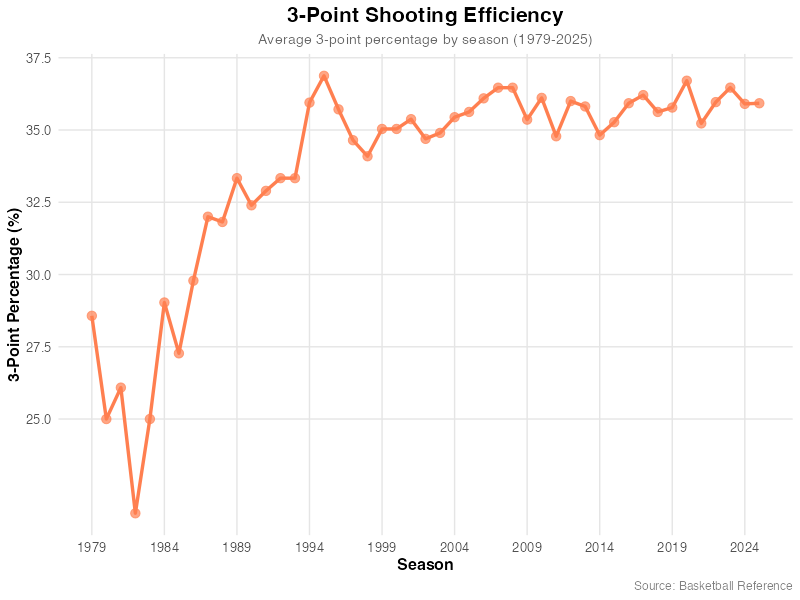

In [7]:
league_avgs <- league_avgs |>
  mutate(start_year = as.numeric(str_sub(season, 1, 4)),
         x3p_num = as.numeric(x3p),
         x3pa_num = as.numeric(x3pa),
         x3p_pct = (x3p_num / x3pa_num) * 100)

ggplot(data = league_avgs, aes(x = start_year, y = x3p_pct)) +
  geom_line(color = "coral", size = 1.2) +
  geom_point(color = "coral", size = 3, alpha = 0.7) +
  labs(
    title = "3-Point Shooting Efficiency",
    subtitle = "Average 3-point percentage by season (1979-2025)",
    x = "Season",
    y = "3-Point Percentage (%)",
    caption = "Source: Basketball Reference"
  ) +
  scale_y_continuous(breaks = seq(25, 40, 2.5)) +
  scale_x_continuous(breaks = seq(1979, 2025, 5)) +
  theme_minimal() +
  theme(
    plot.title = element_text(size = 16, face = "bold", hjust = 0.5),
    plot.subtitle = element_text(size = 11, hjust = 0.5, color = "gray40"),
    plot.caption = element_text(size = 9, color = "gray50"),
    axis.title = element_text(size = 12, face = "bold"),
    axis.text = element_text(size = 10),
    panel.grid.minor = element_blank(),
    panel.grid.major = element_line(color = "gray90")
  )

In [8]:
league_avgs <- league_avgs |>
  mutate(start_year = as.numeric(str_sub(season, 1, 4)),
         x3pa_num = as.numeric(x3pa)) |>
  arrange(start_year)
five_year_changes <- league_avgs |>
  mutate(x3pa_5yr_ago = lag(x3pa_num, 5),
         five_year_change = x3pa_num - x3pa_5yr_ago,
         five_year_pct_change = (five_year_change / x3pa_5yr_ago) * 100,
         period = paste(start_year - 5, "-", start_year)) |>
  filter(!is.na(five_year_change)) |>
  select(start_year, period, x3pa_num, x3pa_5yr_ago, five_year_change, five_year_pct_change)
biggest_increase <- five_year_changes |>
  arrange(desc(five_year_change)) |>
  slice(1)
print("5-Year Changes in 3PA:")
print(five_year_changes)
print("\nBiggest 5-Year Increase:")
print(biggest_increase)
cat("\n\nSummary of 5-Year Changes:\n")
cat("Biggest absolute increase:", biggest_increase$five_year_change, "attempts\n")
cat("Period:", biggest_increase$period, "\n")
cat("From", biggest_increase$x3pa_5yr_ago, "to", biggest_increase$x3pa_num, "attempts per game\n")

[1] "5-Year Changes in 3PA:"
# A tibble: 42 × 6
   start_year period      x3pa_num x3pa_5yr_ago five_year_change five_year_pct_change
        <dbl> <chr>          <dbl>        <dbl>            <dbl>                <dbl>
 1       1984 1979 - 1984      3.1          2.8            0.300                 10.7
 2       1985 1980 - 1985      3.3          2              1.3                   65  
 3       1986 1981 - 1986      4.7          2.3            2.4                  104. 
 4       1987 1982 - 1987      5            2.3            2.7                  117. 
 5       1988 1983 - 1988      6.6          2.4            4.2                  175  
 6       1989 1984 - 1989      6.6          3.1            3.5                  113. 
 7       1990 1985 - 1990      7.1          3.3            3.8                  115. 
 8       1991 1986 - 1991      7.6          4.7            2.9                   61.7
 9       1992 1987 - 1992      9            5              4                     80  
10    

Warriors won the most games. Let us analyze the winnigest team and their players. Go to steph/ visualize his shot making 

In [ ]:
url_2014 <- "https://www.basketball-reference.com/leagues/NBA_2015.html"
season_2014 <- read_html(url_2014) |>
  html_element("table#per_game-team") |>
  html_table(fill = TRUE) |>
  clean_names() |>
  mutate(season = "2014-15")
url_2015 <- "https://www.basketball-reference.com/leagues/NBA_2016.html"
season_2015 <- read_html(url_2015) |>
  html_element("table#per_game-team") |>
  html_table(fill = TRUE) |>
  clean_names() |>
  mutate(season = "2015-16")
url_2016 <- "https://www.basketball-reference.com/leagues/NBA_2017.html"
season_2016 <- read_html(url_2016) |>
  html_element("table#per_game-team") |>
  html_table(fill = TRUE) |>
  clean_names() |>
  mutate(season = "2016-17")
url_2017 <- "https://www.basketball-reference.com/leagues/NBA_2018.html"
season_2017 <- read_html(url_2017) |>
  html_element("table#per_game-team") |>
  html_table(fill = TRUE) |>
  clean_names() |>
  mutate(season = "2017-18")
url_2018 <- "https://www.basketball-reference.com/leagues/NBA_2019.html"
season_2018 <- read_html(url_2018) |>
  html_element("table#per_game-team") |>
  html_table(fill = TRUE) |>
  clean_names() |>
  mutate(season = "2018-19")


In [ ]:
win_loss_2014 <- read_csv("/Users/pranavkandula/Desktop/School/Fall 2025/EDAV/EDAV-Final-Project/data/advanced_stats_nba (2).csv") |>
  rename(W = W)
win_loss_2015 <- read_csv ("/Users/pranavkandula/Desktop/School/Fall 2025/EDAV/EDAV-Final-Project/data/advanced_stats_nba_2015.csv") |>
  rename(W = W)
win_loss_2016 <- read_csv ("/Users/pranavkandula/Desktop/School/Fall 2025/EDAV/EDAV-Final-Project/data/advanced_stats_nba_2016.csv") |>
  rename(W = W)
win_loss_2017 <- read_csv ("/Users/pranavkandula/Desktop/School/Fall 2025/EDAV/EDAV-Final-Project/data/advanced_stats_nba_2017.csv") |> 
  rename(W = W)
win_loss_2017 <- win_loss_2017 |>
  rename(team = Team)
win_loss_2018 <- read_csv ("/Users/pranavkandula/Desktop/School/Fall 2025/EDAV/EDAV-Final-Project/data/advanced_stats_nba_2018.csv") |>
  rename(W = W)

New names:
• `` -> `...5`
• `` -> `...6`
• `` -> `...7`
• `` -> `...8`
• `` -> `...9`
• `` -> `...10`
• `` -> `...11`
• `` -> `...12`
• `` -> `...13`
• `` -> `...14`
• `` -> `...15`
• `` -> `...16`
• `` -> `...17`
• `` -> `...18`
• `` -> `...19`
• `` -> `...20`
• `` -> `...21`
• `` -> `...22`
• `` -> `...23`
• `` -> `...24`
• `` -> `...25`
• `` -> `...26`
• `` -> `...27`
• `` -> `...28`
• `` -> `...29`
• `` -> `...30`
• `` -> `...31`
Rows: 32 Columns: 31
── Column specification ──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): team
dbl  (3): Rk, W, L
lgl (27): ...5, ...6, ...7, ...8, ...9, ...10, ...11, ...12, ...13, ...14, ...15, ...16, ...17, ...18, ...19, ...20, ...21, ...22, ...23, ...24, ....

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
New names:
• `` -> `...5`
• `` -> `.

In [15]:
season_2014 <- season_2014 |>
  left_join(win_loss_2014, by = "team") 
season_2015 <- season_2015 |>
  left_join(win_loss_2015, by = "team") 
season_2016 <- season_2016 |>
  left_join(win_loss_2016, by = "team") 
season_2017 <- season_2017 |>
  left_join(win_loss_2017, by = "team") 
season_2018 <- season_2018 |>
  left_join(win_loss_2018, by = "team") 



In [ ]:
# List of seasons
top10_list <- list(
  "2014-15" = season_2014,
  "2015-16" = season_2015,
  "2016-17" = season_2016,
  "2017-18" = season_2017,
  "2018-19" = season_2018
)

# Prepare top 10 for each season
top10_list <- lapply(top10_list, function(df) {
  df %>%
    mutate(
      W = as.numeric(W),
      x3pa = as.numeric(x3pa),
      x3p_percent = as.numeric(x3p_percent)
    ) %>%
    arrange(desc(W)) %>%
    slice(1:10)
})

season_names <- names(top10_list)
fig <- plot_ly()

# Add traces for each season
for(i in seq_along(top10_list)) {
  season_data <- top10_list[[i]]
  
  fig <- add_trace(
    fig,
    data = season_data,
    x = ~W,
    y = ~team,
    type = "bar",
    orientation = "h",
    marker = list(
      color = ~x3p_percent,
      colorscale = list(c(0, "lightblue"), c(1, "darkblue")),
      colorbar = list(title = "3P%")
    ),
    text = ~paste0("Team: ", team, "<br>Wins: ", W, 
                   "<br>3PA: ", x3pa, "<br>3P%: ", 
                   round(x3p_percent * 100, 1), "%"),
    hoverinfo = "text",
    visible = ifelse(i == 1, TRUE, FALSE)
  )
}

# Create dropdown buttons with update method
buttons <- lapply(seq_along(season_names), function(i) {
  visible <- rep(FALSE, length(season_names))
  visible[i] <- TRUE
  
  # Get team names for this season, reversed for proper display
  team_order <- rev(top10_list[[i]]$team)
  
  list(
    method = "update",  # Changed from "restyle"
    args = list(
      list(visible = visible),  # Update trace visibility
      list(yaxis = list(        # Update y-axis categories
        title = "",
        categoryorder = "array",
        categoryarray = team_order
      ))
    ),
    label = season_names[i]
  )
})

# Layout
fig <- fig %>%
  layout(
    title = "Top 10 Teams: Wins and 3-Point Shooting (2014-2019)",
    xaxis = list(title = "Wins"),
    yaxis = list(
      title = "",
      categoryorder = "array",
      categoryarray = rev(top10_list[[1]]$team)  # Initial display
    ),
    updatemenus = list(
      list(
        active = 0,
        buttons = buttons,
        x = 0.1,
        xanchor = "left",
        y = 1.15,
        yanchor = "top"
      )
    ),
    showlegend = FALSE
  )

fig